# フィッシャーの線形判別器

## 定数の宣言

In [5]:
beta = pi / 4
get_sigma = function(beta) {
 matrix(c(
  9 - 8 * cos(beta)^2,
  8 * cos(beta) * sin(beta),
  8 * cos(beta) * sin(beta),
  9 - 8 * sin(beta)^2
  ), ncol = 2)
}

mu1 = c(2, 0)
mu2 = c(-2, 0)

alpha = 0.5
n = 600
n1 = sum(runif(600) < alpha)
n2 = n - n1


ここにあるalphaの値を変更することで、線形判別器に対して任意の事前確率を設定することができる。

## 線形判別器

In [6]:
sigma = get_sigma(beta)
get_a = function() solve(sigma) %*% (mu1-mu2)
get_b = function() -1 / 2 * (t(mu1) %*% solve(sigma) %*% mu1 - t(mu2) %*% solve(sigma) %*% mu2) + log(n1 / n2)

a = get_a()
b = get_b()
                   
linear = function(x, a, b) {
  if (a[2] == 0) {
    rep(0, length(x))
  } else {
    -(a[1] / a[2]) * x + rep(b / a[2], length(x))
  }
}

## 決定境界の描画

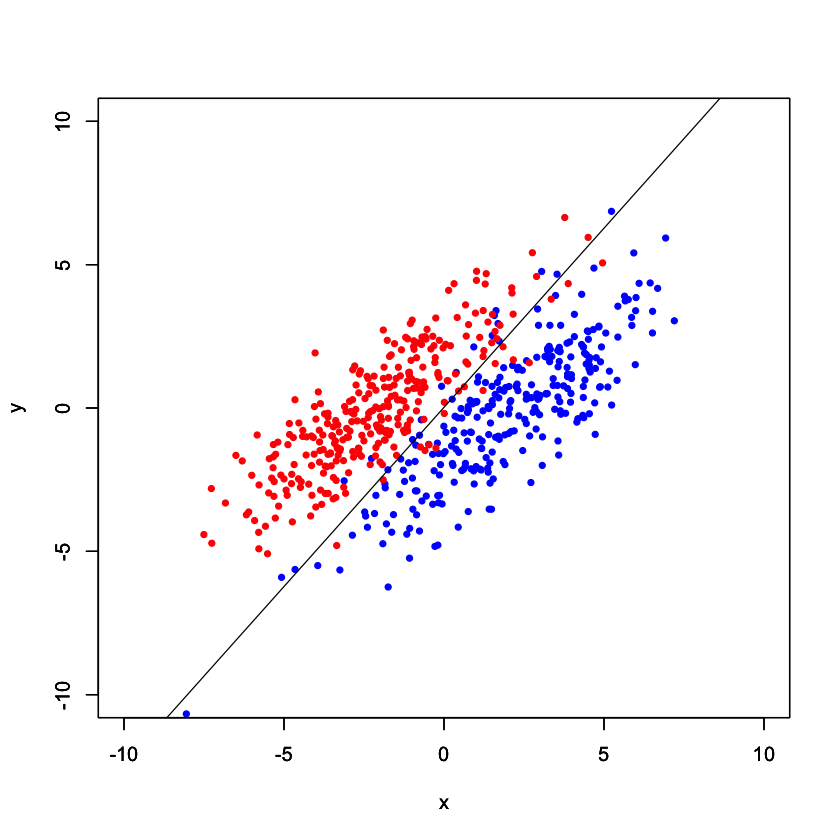

In [7]:
plot_graph = function(a, b) {
  plot(
    rand1[, 1],
    rand1[, 2],
    xlab = "x",
    ylab = "y",
    xlim = c(-10, 10),
    ylim = c(-10, 10),
    col = "blue",
    pch = 20
  )
  par(new = T)
  plot(
    rand2[, 1],
    rand2[, 2],
    xlab = "x",
    ylab = "y",
    xlim = c(-10, 10),
    ylim = c(-10, 10),
    col = "red",
    pch = 20
  )
    
  par(new = T)
  if (a[2] == 0) {
    abline(v = 0)
  } else {
    plot(
      -10:10,
      linear(-10:10, a, b),
      xlab = "x",
      ylab = "y",
      xlim = c(-10, 10),
      ylim = c(-10, 10),
      type = "l"
    )
  }
}
library(mvtnorm)

rand1 = rmvnorm(n = n1, mean = c(2, 0), sigma)
rand2 = rmvnorm(n = n2, mean = c(-2, 0), sigma)
plot_graph(a, b)

## 傾き変える

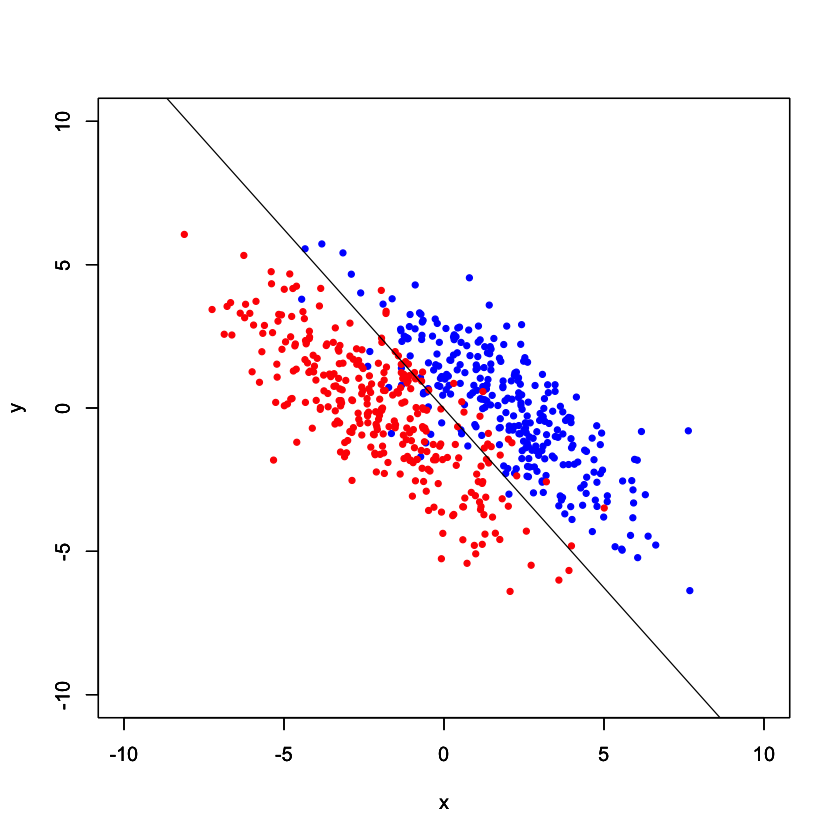

In [8]:
beta = - pi / 4
sigma = get_sigma(beta)

rand1 = rmvnorm(n = n1, mean = c(2, 0), sigma)
rand2 = rmvnorm(n = n2, mean = c(-2, 0), sigma)
a = get_a()
b = get_b()
plot_graph(a, b)